## Scrape the data from Flipkart website and perform EDA: 
1.	Using beautifulsoup scrape the Flipkart smartphones page
2.	Store the data in a pandas dataframe
3.	Extract features of smartphones in separate columns
4.	Take care of data types, convert numerical data types to int or float
5.	Handle duplicate and missing values
6.	Perform end to end EDA and mention the observations in markdown cells



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
import time

import warnings
warnings.filterwarnings('ignore')


C:\Users\aysha\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
URL='https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
page = requests.get(URL)
page.status_code

200

In [3]:
soup = BeautifulSoup(page.content,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim2.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.615ed9.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x

In [4]:
product_details=soup.find_all('div',class_="_3pLy-c row")
print(len(product_details))
product_details

24


[<div class="_3pLy-c row"><div class="col col-7-12"><div class="_2tfzpE"><span>Sponsored</span></div><div class="_4rR01T">GREENBERRI CRETA</div><div class="gUuXy-"><span class="_1lRcqv" id="productRating_LSTMOBGRUC9JUHHTKDKFRDHJS_MOBGRUC9JUHHTKDK_"><div class="_3LWZlK">4.4</div></span><span class="_2_R_DZ"><span><span>29 Ratings </span><span class="_13vcmD">&amp;</span><span> 7 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">32 MB RAM | 32 MB ROM | Expandable Upto 32 GB</li><li class="rgWa7D">6.1 cm (2.4 inch) Display</li><li class="rgWa7D">2MP Rear Camera</li><li class="rgWa7D">2500 mAh Battery</li><li class="rgWa7D">6 MONTH</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹1,299</div><div class="_3I9_wc _27UcVY">₹<!-- -->1,999</div><div class="_3Ay6Sb"><span>35% off</span></div></div><div class="_3tcB5a p8ucoS"><div><div class="_2Tpdn3" style="color:#000000;font-si

In [5]:
# Storing information in lists
titles =[]
prices =[]
ratings =[]
RnR =[]
features =[]

# loop to go through webpages
for x in range(1,21):
    start_time = time.time()
    
    URL='https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'.format(x)
    page =requests.get(URL)
    soup =BeautifulSoup(page.content, 'html.parser')
    
    # Extracting product details of all products on the webpage
    product_details = soup.find_all('div', class_ = '_3pLy-c row')
    
    for product in product_details:
    
        name = product.find('div',class_="_4rR01T")
        if name is None:
            titles.append(np.nan)
        else:
            titles.append(name.text)
        
        price = product.find('div',class_="_30jeq3 _1_WHN1")
        if price is None:
            prices.append(np.nan)
        else:
            prices.append(price.text)
        
        rating = product.find('div',class_="_3LWZlK")
        if rating is None:
            ratings.append(np.nan)
        else:
            ratings.append(rating.text)
        
        ratings_reviews = product.find('span',class_="_2_R_DZ")
        if ratings_reviews is None:
            RnR.append(np.nan)
        else:
            RnR.append(ratings_reviews.text)
    
        f = []
        specifications = product.find('div', class_ = 'fMghEO')
        specs = specifications.find_all('li', class_ = 'rgWa7D')
     
        for feature in specs:
            f.append(feature.text)
        features.append(f)
       
    
        
    end_time = time.time()

    print('Page {} completed in {} seconds'.format(x, end_time-start_time))

Page 1 completed in 1.2867496013641357 seconds
Page 2 completed in 1.1159827709197998 seconds
Page 3 completed in 1.5381498336791992 seconds
Page 4 completed in 1.1234149932861328 seconds
Page 5 completed in 1.3485593795776367 seconds
Page 6 completed in 1.1190450191497803 seconds
Page 7 completed in 1.4644279479980469 seconds
Page 8 completed in 1.130359172821045 seconds
Page 9 completed in 1.500274419784546 seconds
Page 10 completed in 1.5806894302368164 seconds
Page 11 completed in 1.1832950115203857 seconds
Page 12 completed in 1.3315660953521729 seconds
Page 13 completed in 1.2511534690856934 seconds
Page 14 completed in 0.7525334358215332 seconds
Page 15 completed in 0.7131052017211914 seconds
Page 16 completed in 1.3625438213348389 seconds
Page 17 completed in 1.482720136642456 seconds
Page 18 completed in 1.0817556381225586 seconds
Page 19 completed in 1.4030170440673828 seconds
Page 20 completed in 1.1598925590515137 seconds


In [6]:
print("Total no.of titles available : ",len(titles))
print("Total no.of prices available : ",len(prices))
print("Total no.of ratings available: ",len(ratings))
print("Total no.of reviews and ratings available  : ",len(RnR))
print("Total no.of specifications lists available : ",len(features))

Total no.of titles available :  432
Total no.of prices available :  432
Total no.of ratings available:  432
Total no.of reviews and ratings available  :  432
Total no.of specifications lists available :  432


In [7]:
data = {'Product_name' : titles,
        'Price'        : prices,
        'Rating'       : ratings,
        'No_of_RnR'    : RnR,
        'Features'     : features}

df = pd.DataFrame(data)
df.head(10)

,Product_name,Price,Rating,No_of_RnR,Features
0,GREENBERRI CRETA,"₹1,299",4.4,29 Ratings & 7 Reviews,[32 MB RAM | 32 MB ROM | Expandable Upto 32 GB...
1,Good One 2192,"₹1,199",3.8,"1,506 Ratings & 264 Reviews",[32 MB RAM | 32 MB ROM | Expandable Upto 32 GB...
2,"APPLE iPhone 14 (Blue, 128 GB)","₹60,999",4.6,"2,31,506 Ratings & 8,887 Reviews","[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ..."
3,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)","₹14,990",4.2,"65,587 Ratings & 4,599 Reviews","[6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,..."
4,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)","₹14,990",4.2,"65,587 Ratings & 4,599 Reviews","[6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,..."
5,"vivo T2x 5G (Aurora Gold, 128 GB)","₹14,999",4.3,"49,056 Ratings & 2,898 Reviews","[8 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."
6,"SAMSUNG Galaxy F14 5G (OMG Black, 128 GB)","₹14,990",4.2,"65,587 Ratings & 4,599 Reviews","[6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,..."
7,Cellecor E10,"₹1,376",3.8,371 Ratings & 21 Reviews,[32 MB RAM | 32 MB ROM | Expandable Upto 32 GB...
8,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB)","₹16,996",4.4,"1,33,702 Ratings & 9,324 Reviews","[6 GB RAM | 128 GB ROM, 16.74 cm (6.59 inch) D..."
9,"vivo T2x 5G (Glimmer Black, 128 GB)","₹12,999",4.4,"2,43,122 Ratings & 13,240 Reviews","[6 GB RAM | 128 GB ROM, 16.71 cm (6.58 inch) F..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_name  432 non-null    object
 1   Price         432 non-null    object
 2   Rating        431 non-null    object
 3   No_of_RnR     431 non-null    object
 4   Features      432 non-null    object
dtypes: object(5)
memory usage: 17.0+ KB


In [9]:
df.Rating = df.Rating.astype(float)
df.Price = df.Price.str.replace('₹','').str.replace(',','').astype(float)

In [10]:
df.head()

,Product_name,Price,Rating,No_of_RnR,Features
0,GREENBERRI CRETA,1299.0,4.4,29 Ratings & 7 Reviews,[32 MB RAM | 32 MB ROM | Expandable Upto 32 GB...
1,Good One 2192,1199.0,3.8,"1,506 Ratings & 264 Reviews",[32 MB RAM | 32 MB ROM | Expandable Upto 32 GB...
2,"APPLE iPhone 14 (Blue, 128 GB)",60999.0,4.6,"2,31,506 Ratings & 8,887 Reviews","[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ..."
3,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)",14990.0,4.2,"65,587 Ratings & 4,599 Reviews","[6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,..."
4,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",14990.0,4.2,"65,587 Ratings & 4,599 Reviews","[6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,..."


In [11]:
def get_ratings(text):
    if text is np.nan:
        return 0
    else:
        rating_regex = re.compile(r'([\d,\s]+)Ratings')
        ratings = rating_regex.findall(text)
        ratings = int(ratings[0].strip().replace(',',''))
        return ratings
    
def get_reviews(text):
    if text is np.nan:
        return 0
    else:
        review_regex = re.compile(r'([\d,\s]+)Reviews')
        reviews = review_regex.findall(text)
        reviews = int(reviews[0].strip().replace(',',''))
        return reviews

In [12]:
df['No_of_ratings'] = df.No_of_RnR.apply(get_ratings)
df['No_of_reviews'] = df.No_of_RnR.apply(get_reviews)
df.drop('No_of_RnR', axis = 1, inplace = True)

In [13]:
df.head()

,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews
0,GREENBERRI CRETA,1299.0,4.4,[32 MB RAM | 32 MB ROM | Expandable Upto 32 GB...,29,7
1,Good One 2192,1199.0,3.8,[32 MB RAM | 32 MB ROM | Expandable Upto 32 GB...,1506,264
2,"APPLE iPhone 14 (Blue, 128 GB)",60999.0,4.6,"[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ...",231506,8887
3,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)",14990.0,4.2,"[6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,...",65587,4599
4,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",14990.0,4.2,"[6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,...",65587,4599


In [14]:
brand_regex = re.compile(r'^\w+')
df['Brand'] = df.Product_name.apply(lambda s : brand_regex.findall(s)[0])
df.head()

,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews,Brand
0,GREENBERRI CRETA,1299.0,4.4,[32 MB RAM | 32 MB ROM | Expandable Upto 32 GB...,29,7,GREENBERRI
1,Good One 2192,1199.0,3.8,[32 MB RAM | 32 MB ROM | Expandable Upto 32 GB...,1506,264,Good
2,"APPLE iPhone 14 (Blue, 128 GB)",60999.0,4.6,"[128 GB ROM, 15.49 cm (6.1 inch) Super Retina ...",231506,8887,APPLE
3,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)",14990.0,4.2,"[6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,...",65587,4599,SAMSUNG
4,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",14990.0,4.2,"[6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,...",65587,4599,SAMSUNG


In [15]:
df.Features = df.Features.apply(lambda x : ','.join(x))
df.head()

,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews,Brand
0,GREENBERRI CRETA,1299.0,4.4,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",29,7,GREENBERRI
1,Good One 2192,1199.0,3.8,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",1506,264,Good
2,"APPLE iPhone 14 (Blue, 128 GB)",60999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",231506,8887,APPLE
3,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)",14990.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",65587,4599,SAMSUNG
4,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",14990.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",65587,4599,SAMSUNG


In [16]:
def get_processor(text):
    processor_regex = re.compile(r'([A-Za-z0-9\s]+)Processor')
    processor = processor_regex.findall(text)
    if len(processor) == 0:
        return np.nan
    else:
        return processor[0].strip()
    
df['Processor'] = df.Features.apply(get_processor)
df.head(5)

,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews,Brand,Processor
0,GREENBERRI CRETA,1299.0,4.4,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",29,7,GREENBERRI,NaN
1,Good One 2192,1199.0,3.8,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",1506,264,Good,NaN
2,"APPLE iPhone 14 (Blue, 128 GB)",60999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",231506,8887,APPLE,6 Core Processor
3,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)",14990.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",65587,4599,SAMSUNG,Octa Core
4,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",14990.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",65587,4599,SAMSUNG,Octa Core


In [17]:
def get_ram(text):
    regex = re.compile(r'([A-Za-z0-9\s]+)RAM')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()
    
df['RAM'] = df.Features.apply(get_ram)
df.head()


,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews,Brand,Processor,RAM
0,GREENBERRI CRETA,1299.0,4.4,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",29,7,GREENBERRI,NaN,32 MB
1,Good One 2192,1199.0,3.8,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",1506,264,Good,NaN,32 MB
2,"APPLE iPhone 14 (Blue, 128 GB)",60999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",231506,8887,APPLE,6 Core Processor,NaN
3,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)",14990.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",65587,4599,SAMSUNG,Octa Core,6 GB
4,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",14990.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",65587,4599,SAMSUNG,Octa Core,6 GB


In [18]:
def get_rom(text):
    regex = re.compile(r'([A-Za-z0-9\s]+)ROM')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()

df['ROM'] = df.Features.apply(get_rom)
df.head(5)

,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews,Brand,Processor,RAM,ROM
0,GREENBERRI CRETA,1299.0,4.4,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",29,7,GREENBERRI,NaN,32 MB,32 MB
1,Good One 2192,1199.0,3.8,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",1506,264,Good,NaN,32 MB,32 MB
2,"APPLE iPhone 14 (Blue, 128 GB)",60999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",231506,8887,APPLE,6 Core Processor,NaN,128 GB
3,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)",14990.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",65587,4599,SAMSUNG,Octa Core,6 GB,128 GB
4,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",14990.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",65587,4599,SAMSUNG,Octa Core,6 GB,128 GB


In [19]:
def get_battery(text):
    regex = re.compile(r'[A-Za-z0-9\s]+mAh')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()
df['Battery'] = df.Features.apply(get_battery)
df.head()    

,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews,Brand,Processor,RAM,ROM,Battery
0,GREENBERRI CRETA,1299.0,4.4,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",29,7,GREENBERRI,NaN,32 MB,32 MB,2500 mAh
1,Good One 2192,1199.0,3.8,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",1506,264,Good,NaN,32 MB,32 MB,2500 mAh
2,"APPLE iPhone 14 (Blue, 128 GB)",60999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",231506,8887,APPLE,6 Core Processor,NaN,128 GB,NaN
3,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)",14990.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",65587,4599,SAMSUNG,Octa Core,6 GB,128 GB,6000 mAh
4,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",14990.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",65587,4599,SAMSUNG,Octa Core,6 GB,128 GB,6000 mAh


In [20]:
def get_display(text):
    regex = re.compile(r'[0-9\s.]+inch')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()
    
df['Display_Size'] = df.Features.apply(get_display)
df.head()

,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews,Brand,Processor,RAM,ROM,Battery,Display_Size
0,GREENBERRI CRETA,1299.0,4.4,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",29,7,GREENBERRI,NaN,32 MB,32 MB,2500 mAh,2.4 inch
1,Good One 2192,1199.0,3.8,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",1506,264,Good,NaN,32 MB,32 MB,2500 mAh,1.8 inch
2,"APPLE iPhone 14 (Blue, 128 GB)",60999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",231506,8887,APPLE,6 Core Processor,NaN,128 GB,NaN,6.1 inch
3,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)",14990.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",65587,4599,SAMSUNG,Octa Core,6 GB,128 GB,6000 mAh,6.6 inch
4,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",14990.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",65587,4599,SAMSUNG,Octa Core,6 GB,128 GB,6000 mAh,6.6 inch


In [21]:
def get_camera(text):
    regex = re.compile(r'[A-Za-z0-9\s.\(\)\+\|]+Camera')
    result = regex.findall(text)
    if len(result) == 0:
        return np.nan
    else:
        return result[0].strip()
    
df['Camera'] = df.Features.apply(get_camera)
df.head()

,Product_name,Price,Rating,Features,No_of_ratings,No_of_reviews,Brand,Processor,RAM,ROM,Battery,Display_Size,Camera
0,GREENBERRI CRETA,1299.0,4.4,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",29,7,GREENBERRI,NaN,32 MB,32 MB,2500 mAh,2.4 inch,2MP Rear Camera
1,Good One 2192,1199.0,3.8,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",1506,264,Good,NaN,32 MB,32 MB,2500 mAh,1.8 inch,2MP Rear Camera
2,"APPLE iPhone 14 (Blue, 128 GB)",60999.0,4.6,"128 GB ROM,15.49 cm (6.1 inch) Super Retina XD...",231506,8887,APPLE,6 Core Processor,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera
3,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)",14990.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",65587,4599,SAMSUNG,Octa Core,6 GB,128 GB,6000 mAh,6.6 inch,50MP + 2MP | 13MP Front Camera
4,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",14990.0,4.2,"6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,1...",65587,4599,SAMSUNG,Octa Core,6 GB,128 GB,6000 mAh,6.6 inch,50MP + 2MP | 13MP Front Camera


In [22]:
df.drop(['Features'], axis = 1, inplace = True)

In [23]:
df.head()

,Product_name,Price,Rating,No_of_ratings,No_of_reviews,Brand,Processor,RAM,ROM,Battery,Display_Size,Camera
0,GREENBERRI CRETA,1299.0,4.4,29,7,GREENBERRI,NaN,32 MB,32 MB,2500 mAh,2.4 inch,2MP Rear Camera
1,Good One 2192,1199.0,3.8,1506,264,Good,NaN,32 MB,32 MB,2500 mAh,1.8 inch,2MP Rear Camera
2,"APPLE iPhone 14 (Blue, 128 GB)",60999.0,4.6,231506,8887,APPLE,6 Core Processor,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera
3,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)",14990.0,4.2,65587,4599,SAMSUNG,Octa Core,6 GB,128 GB,6000 mAh,6.6 inch,50MP + 2MP | 13MP Front Camera
4,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",14990.0,4.2,65587,4599,SAMSUNG,Octa Core,6 GB,128 GB,6000 mAh,6.6 inch,50MP + 2MP | 13MP Front Camera


In [24]:
columns = ['Brand', 'Product_name','Processor', 'RAM', 'ROM', 'Battery', 'Display_Size', 'Camera', 'No_of_ratings', 'No_of_reviews', 'Rating', 'Price']
df = df[columns]

In [25]:
df.head(10)

,Brand,Product_name,Processor,RAM,ROM,Battery,Display_Size,Camera,No_of_ratings,No_of_reviews,Rating,Price
0,GREENBERRI,GREENBERRI CRETA,NaN,32 MB,32 MB,2500 mAh,2.4 inch,2MP Rear Camera,29,7,4.4,1299.0
1,Good,Good One 2192,NaN,32 MB,32 MB,2500 mAh,1.8 inch,2MP Rear Camera,1506,264,3.8,1199.0
2,APPLE,"APPLE iPhone 14 (Blue, 128 GB)",6 Core Processor,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,231506,8887,4.6,60999.0
3,SAMSUNG,"SAMSUNG Galaxy F14 5G (B.A.E. Purple, 128 GB)",Octa Core,6 GB,128 GB,6000 mAh,6.6 inch,50MP + 2MP | 13MP Front Camera,65587,4599,4.2,14990.0
4,SAMSUNG,"SAMSUNG Galaxy F14 5G (GOAT Green, 128 GB)",Octa Core,6 GB,128 GB,6000 mAh,6.6 inch,50MP + 2MP | 13MP Front Camera,65587,4599,4.2,14990.0
5,vivo,"vivo T2x 5G (Aurora Gold, 128 GB)",Dimensity 6020,8 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera,49056,2898,4.3,14999.0
6,SAMSUNG,"SAMSUNG Galaxy F14 5G (OMG Black, 128 GB)",Octa Core,6 GB,128 GB,6000 mAh,6.6 inch,50MP + 2MP | 13MP Front Camera,65587,4599,4.2,14990.0
7,Cellecor,Cellecor E10,NaN,32 MB,32 MB,2750 mAh,2.4 inch,0.8MP Rear Camera,371,21,3.8,1376.0
8,OnePlus,"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB)",NaN,6 GB,128 GB,5000 mAh,6.59 inch,64MP Rear Camera | 16MP Front Camera,133702,9324,4.4,16996.0
9,vivo,"vivo T2x 5G (Glimmer Black, 128 GB)",Dimensity 6020,6 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera,243122,13240,4.4,12999.0


In [26]:
df.to_csv('Flipkart Phones assignment.csv', index = False)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          432 non-null    object 
 1   Product_name   432 non-null    object 
 2   Processor      199 non-null    object 
 3   RAM            410 non-null    object 
 4   ROM            432 non-null    object 
 5   Battery        411 non-null    object 
 6   Display_Size   432 non-null    object 
 7   Camera         406 non-null    object 
 8   No_of_ratings  432 non-null    int64  
 9   No_of_reviews  432 non-null    int64  
 10  Rating         431 non-null    float64
 11  Price          432 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 40.6+ KB


In [28]:
df.duplicated().value_counts()

False    248
True     184
dtype: int64

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.duplicated().sum()

0

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 431
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          248 non-null    object 
 1   Product_name   248 non-null    object 
 2   Processor      184 non-null    object 
 3   RAM            227 non-null    object 
 4   ROM            248 non-null    object 
 5   Battery        228 non-null    object 
 6   Display_Size   248 non-null    object 
 7   Camera         240 non-null    object 
 8   No_of_ratings  248 non-null    int64  
 9   No_of_reviews  248 non-null    int64  
 10  Rating         247 non-null    float64
 11  Price          248 non-null    float64
dtypes: float64(2), int64(2), object(8)
memory usage: 25.2+ KB


In [32]:
df.isnull().sum()

Brand             0
Product_name      0
Processor        64
RAM              21
ROM               0
Battery          20
Display_Size      0
Camera            8
No_of_ratings     0
No_of_reviews     0
Rating            1
Price             0
dtype: int64

## ==========================================================================
### Analysis of the phones based on the price

In [33]:
# top 20 phones based on the price
top_price=df[["Brand","Product_name","Price"]].sort_values("Price",ascending=False).head(20)
top_price

,Brand,Product_name,Price
415,APPLE,"APPLE iPhone 15 Pro Max (Natural Titanium, 256...",159900.0
384,SAMSUNG,"SAMSUNG Galaxy S23 Ultra 5G (Phantom Black, 25...",124999.0
347,APPLE,"APPLE iPhone 15 Plus (Blue, 128 GB)",89900.0
414,APPLE,"APPLE iPhone 15 (Blue, 256 GB)",89900.0
265,APPLE,"APPLE iPhone 15 (Black, 128 GB)",79900.0
282,APPLE,"APPLE iPhone 15 (Green, 128 GB)",79900.0
153,APPLE,"APPLE iPhone 15 (Blue, 128 GB)",79900.0
387,APPLE,"APPLE iPhone 14 (Purple, 256 GB)",71999.0
98,APPLE,"APPLE iPhone 14 (Blue, 256 GB)",70999.0
132,APPLE,"APPLE iPhone 14 Plus (Midnight, 128 GB)",69999.0


In [34]:
# Highest priced brands 
a=top_price.groupby("Brand")["Price"].max()
a

Brand
APPLE      159900.0
Google      65999.0
SAMSUNG    124999.0
Samsung     49999.0
Name: Price, dtype: float64

In [35]:
b=top_price.groupby("Brand")["Price"].count()
b

Brand
APPLE      15
Google      2
SAMSUNG     2
Samsung     1
Name: Price, dtype: int64

<AxesSubplot:title={'center':'phones with highest price'}, xlabel='Price', ylabel='Product_name'>

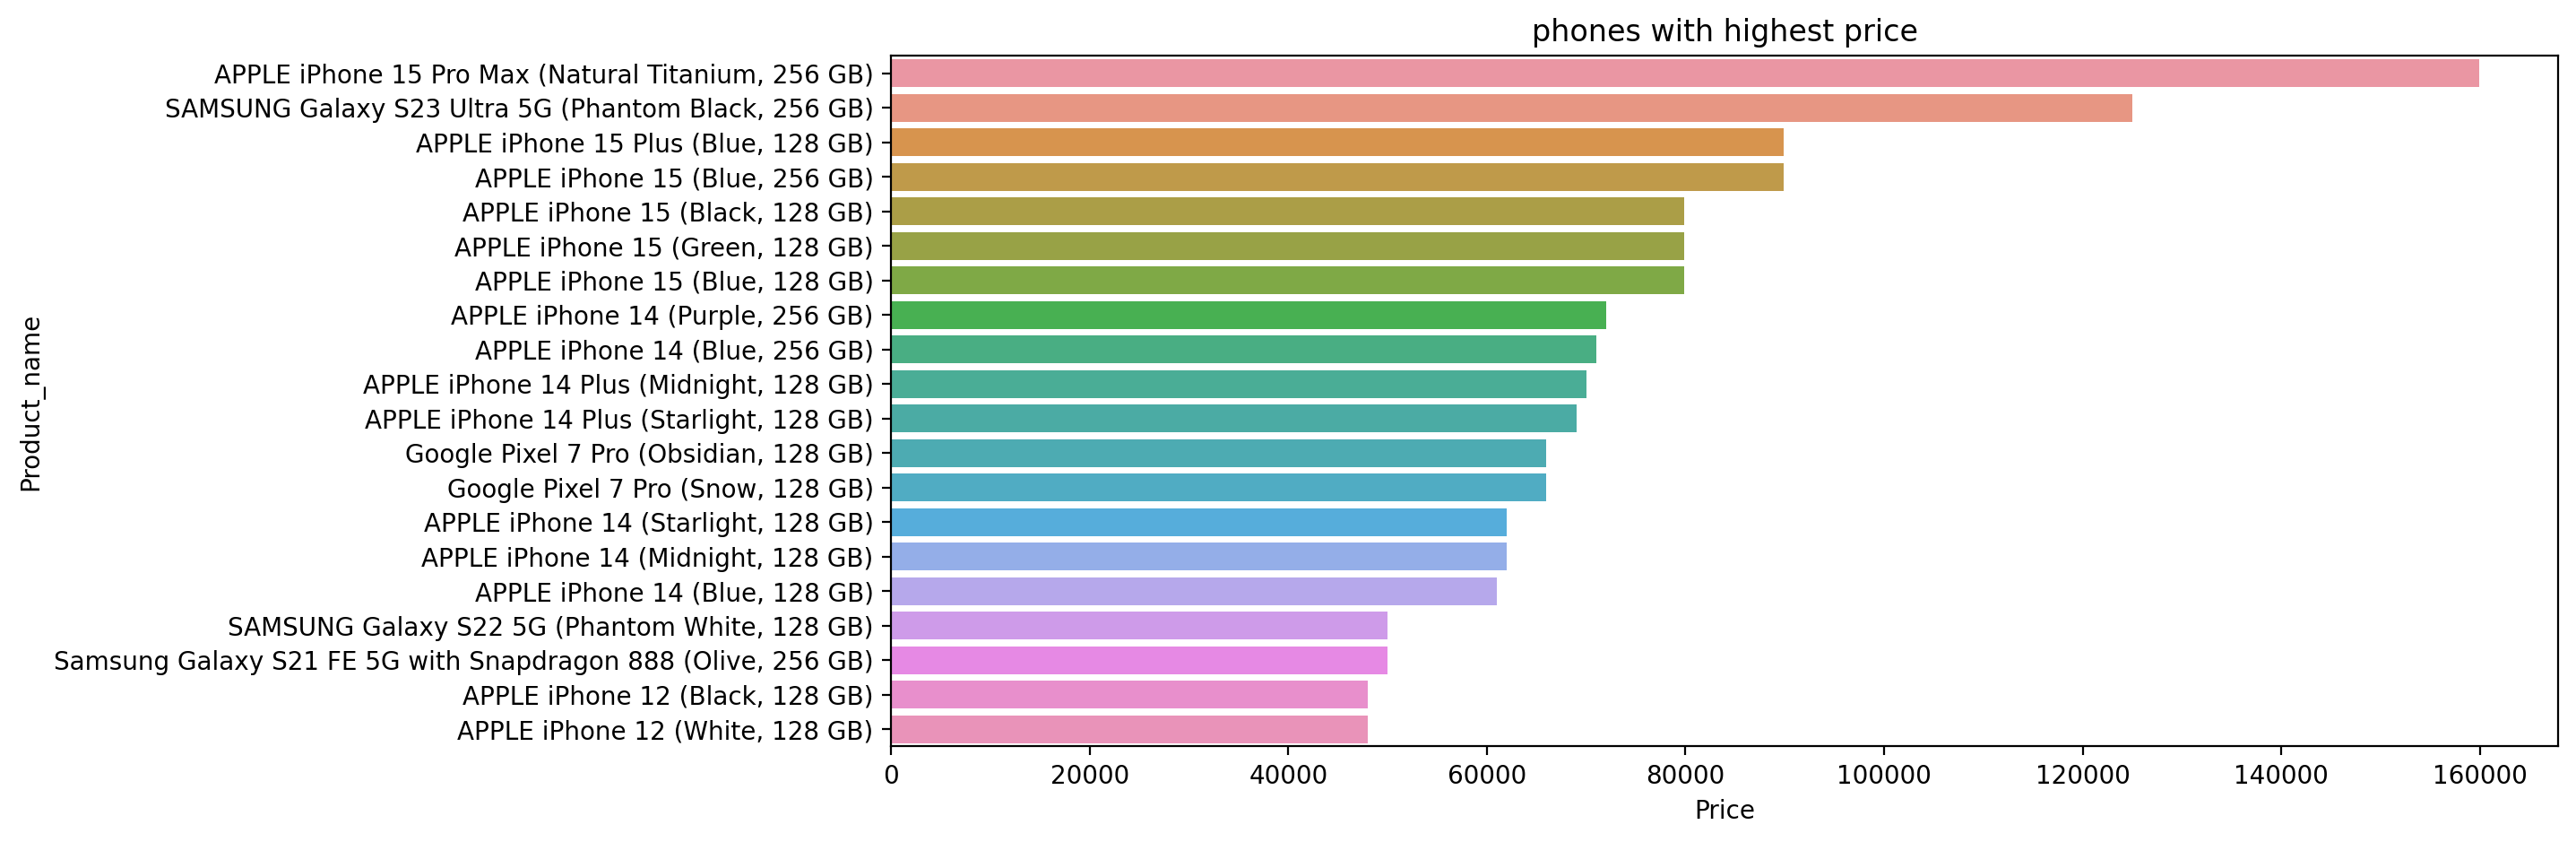

In [36]:
plt.figure(figsize=(12,5),dpi=200)
plt.title("phones with highest price")
sns.barplot("Price","Product_name",data=top_price)

<AxesSubplot:title={'center':'No.of highest priced phones by each brand'}, ylabel='Brand'>

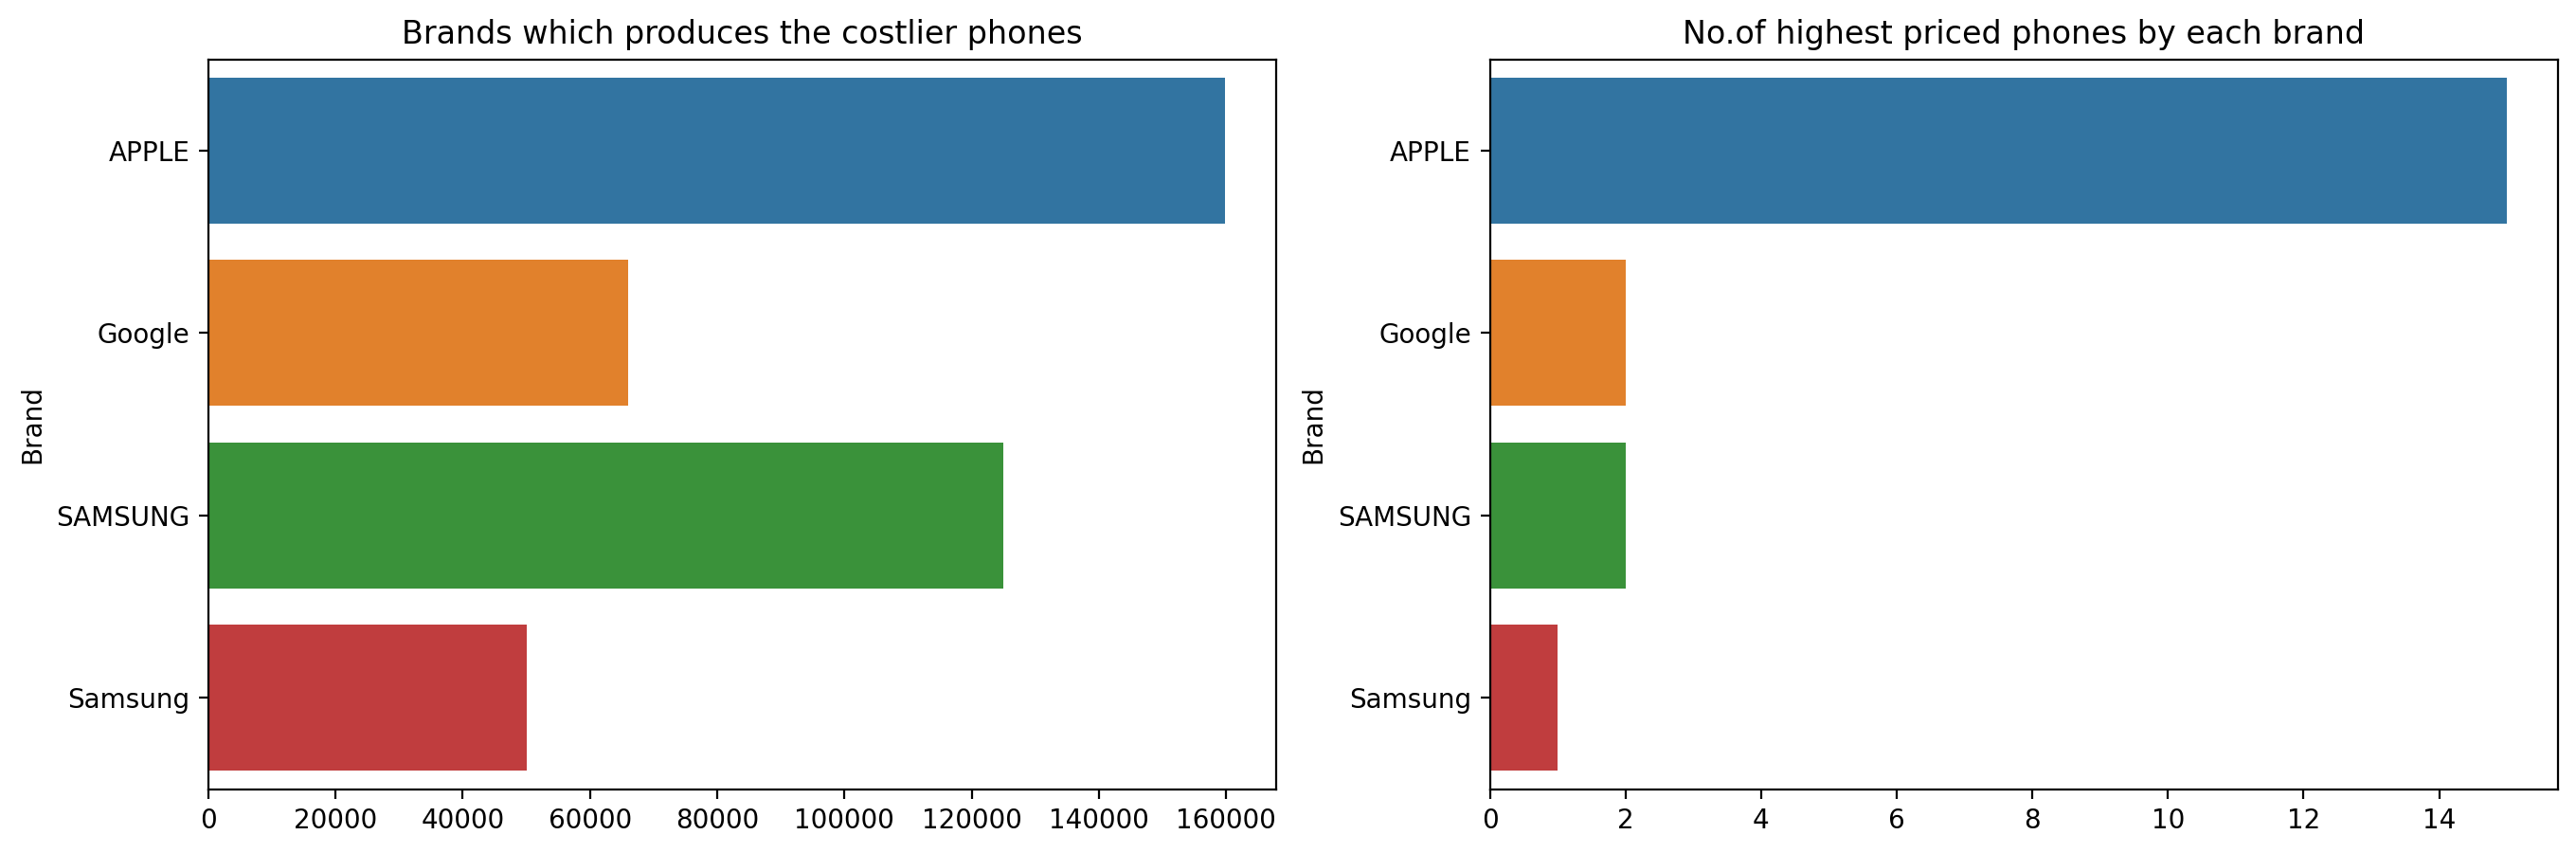

In [37]:
plt.figure(figsize=(16,5),dpi=200)
plt.subplot(1,2,1)
plt.title("Brands which produces the costlier phones")
sns.barplot(a.values,a.index)


plt.subplot(1,2,2)
plt.title("No.of highest priced phones by each brand")
sns.barplot(b.values,b.index)

In [38]:
df.query("Price==Price.min()")

,Brand,Product_name,Processor,RAM,ROM,Battery,Display_Size,Camera,No_of_ratings,No_of_reviews,Rating,Price
396,Snexian,Snexian Guru 310,NaN,32 MB,64 MB,800 mAh,1.8 inch,0.3MP Rear Camera,24371,1920,3.3,601.0



### Analysis on battery

In [39]:
df["Battery"].value_counts()

5000 mAh    133
6000 mAh     33
1000 mAh     12
2750 mAh      8
800 mAh       6
4600 mAh      6
4500 mAh      5
1450 mAh      3
2500 mAh      3
4300 mAh      3
4270 mAh      2
4980 mAh      2
850 mAh       2
4926 mAh      2
400 mAh       2
4400 mAh      2
1750 mAh      1
1900 mAh      1
3700 mAh      1
3600 mAh      1
Name: Battery, dtype: int64

In [40]:
battery=df["Battery"][df["Battery"]=="5000 mAh"].value_counts()
battery

5000 mAh    133
Name: Battery, dtype: int64

In [41]:
print("Percentage of phones having 5000 mAh : ",round(battery/480*100,2))

Percentage of phones having 5000 mAh :  5000 mAh    27.71
Name: Battery, dtype: float64


## =========================================================================

### Analysis on memory

In [42]:
ram=df["RAM"].value_counts()
ram

8 GB     67
4 GB     54
6 GB     47
32 MB    31
12 GB    13
2 GB      7
4 MB      5
3 GB      1
64 MB     1
30 MB     1
Name: RAM, dtype: int64

In [43]:
rom=df["ROM"].value_counts()
rom

128 GB    121
64 GB      46
256 GB     39
32 MB      27
4 MB        4
64 MB       4
32 GB       2
NA          1
128 MB      1
24 MB       1
512 GB      1
16 GB       1
Name: ROM, dtype: int64

In [44]:
rom.drop("NA",inplace =True)

In [46]:
high_rom=df[["Brand","Product_name","ROM"]][df["ROM"]=='256 GB']
high_rom

,Brand,Product_name,ROM
34,MOTOROLA,"MOTOROLA Edge 40 (Nebula Green, 256 GB)",256 GB
52,OnePlus,"OnePlus Nord CE 3 Lite 5G (Pastel Lime, 256 GB)",256 GB
59,MOTOROLA,"MOTOROLA g54 5G (Pearl Blue, 256 GB)",256 GB
63,realme,"realme 11 Pro+ 5G (Astral Black, 256 GB)",256 GB
72,POCO,"POCO X5 Pro 5G (Horizon Blue, 256 GB)",256 GB
74,MOTOROLA,"MOTOROLA g54 5G (Mint Green, 256 GB)",256 GB
83,REDMI,"REDMI Note 12 Pro 5G (Glacier Blue, 256 GB)",256 GB
88,MOTOROLA,"MOTOROLA g54 5G (Midnight Blue, 256 GB)",256 GB
93,MOTOROLA,"MOTOROLA g84 5G (Marshmallow Blue, 256 GB)",256 GB
98,APPLE,"APPLE iPhone 14 (Blue, 256 GB)",256 GB


In [47]:
romplot=high_rom.groupby(by="Brand")["ROM"].count()
romplot

Brand
APPLE       4
Infinix     2
MOTOROLA    6
OPPO        2
OnePlus     3
POCO        3
REDMI       7
SAMSUNG     3
Samsung     1
realme      3
vivo        5
Name: ROM, dtype: int64

In [48]:
high_ram=df[["Brand","Product_name","RAM"]][df["RAM"]=='8 GB']
high_ram

,Brand,Product_name,RAM
5,vivo,"vivo T2x 5G (Aurora Gold, 128 GB)",8 GB
23,vivo,"vivo T2x 5G (Marine Blue, 128 GB)",8 GB
34,MOTOROLA,"MOTOROLA Edge 40 (Nebula Green, 256 GB)",8 GB
44,MOTOROLA,"MOTOROLA Edge 40 Neo (Soothing Sea, 128 GB)",8 GB
49,Infinix,"Infinix HOT 30i (Mirror Black, 128 GB)",8 GB
...,...,...,...
406,SAMSUNG,"SAMSUNG Galaxy A34 5G (Awesome Graphite, 256 GB)",8 GB
410,OPPO,"OPPO A79 5G (Glowing Green, 128 GB)",8 GB
411,POCO,"POCO M4 Pro (Cool Blue, 128 GB)",8 GB
421,SAMSUNG,"SAMSUNG Galaxy A34 5G (Awesome Graphite, 128 GB)",8 GB


In [49]:
ramplot=high_ram.groupby(by="Brand")["RAM"].count()
ramplot

Brand
Google       5
Infinix      6
MOTOROLA    12
OPPO         4
OnePlus      5
POCO         4
REDMI        7
SAMSUNG      9
Samsung      1
Tecno        1
itel         1
realme       6
vivo         6
Name: RAM, dtype: int64

<AxesSubplot:title={'center':'No.of Phones by each Brand with highest ROM(256 GB) '}, ylabel='Brand'>

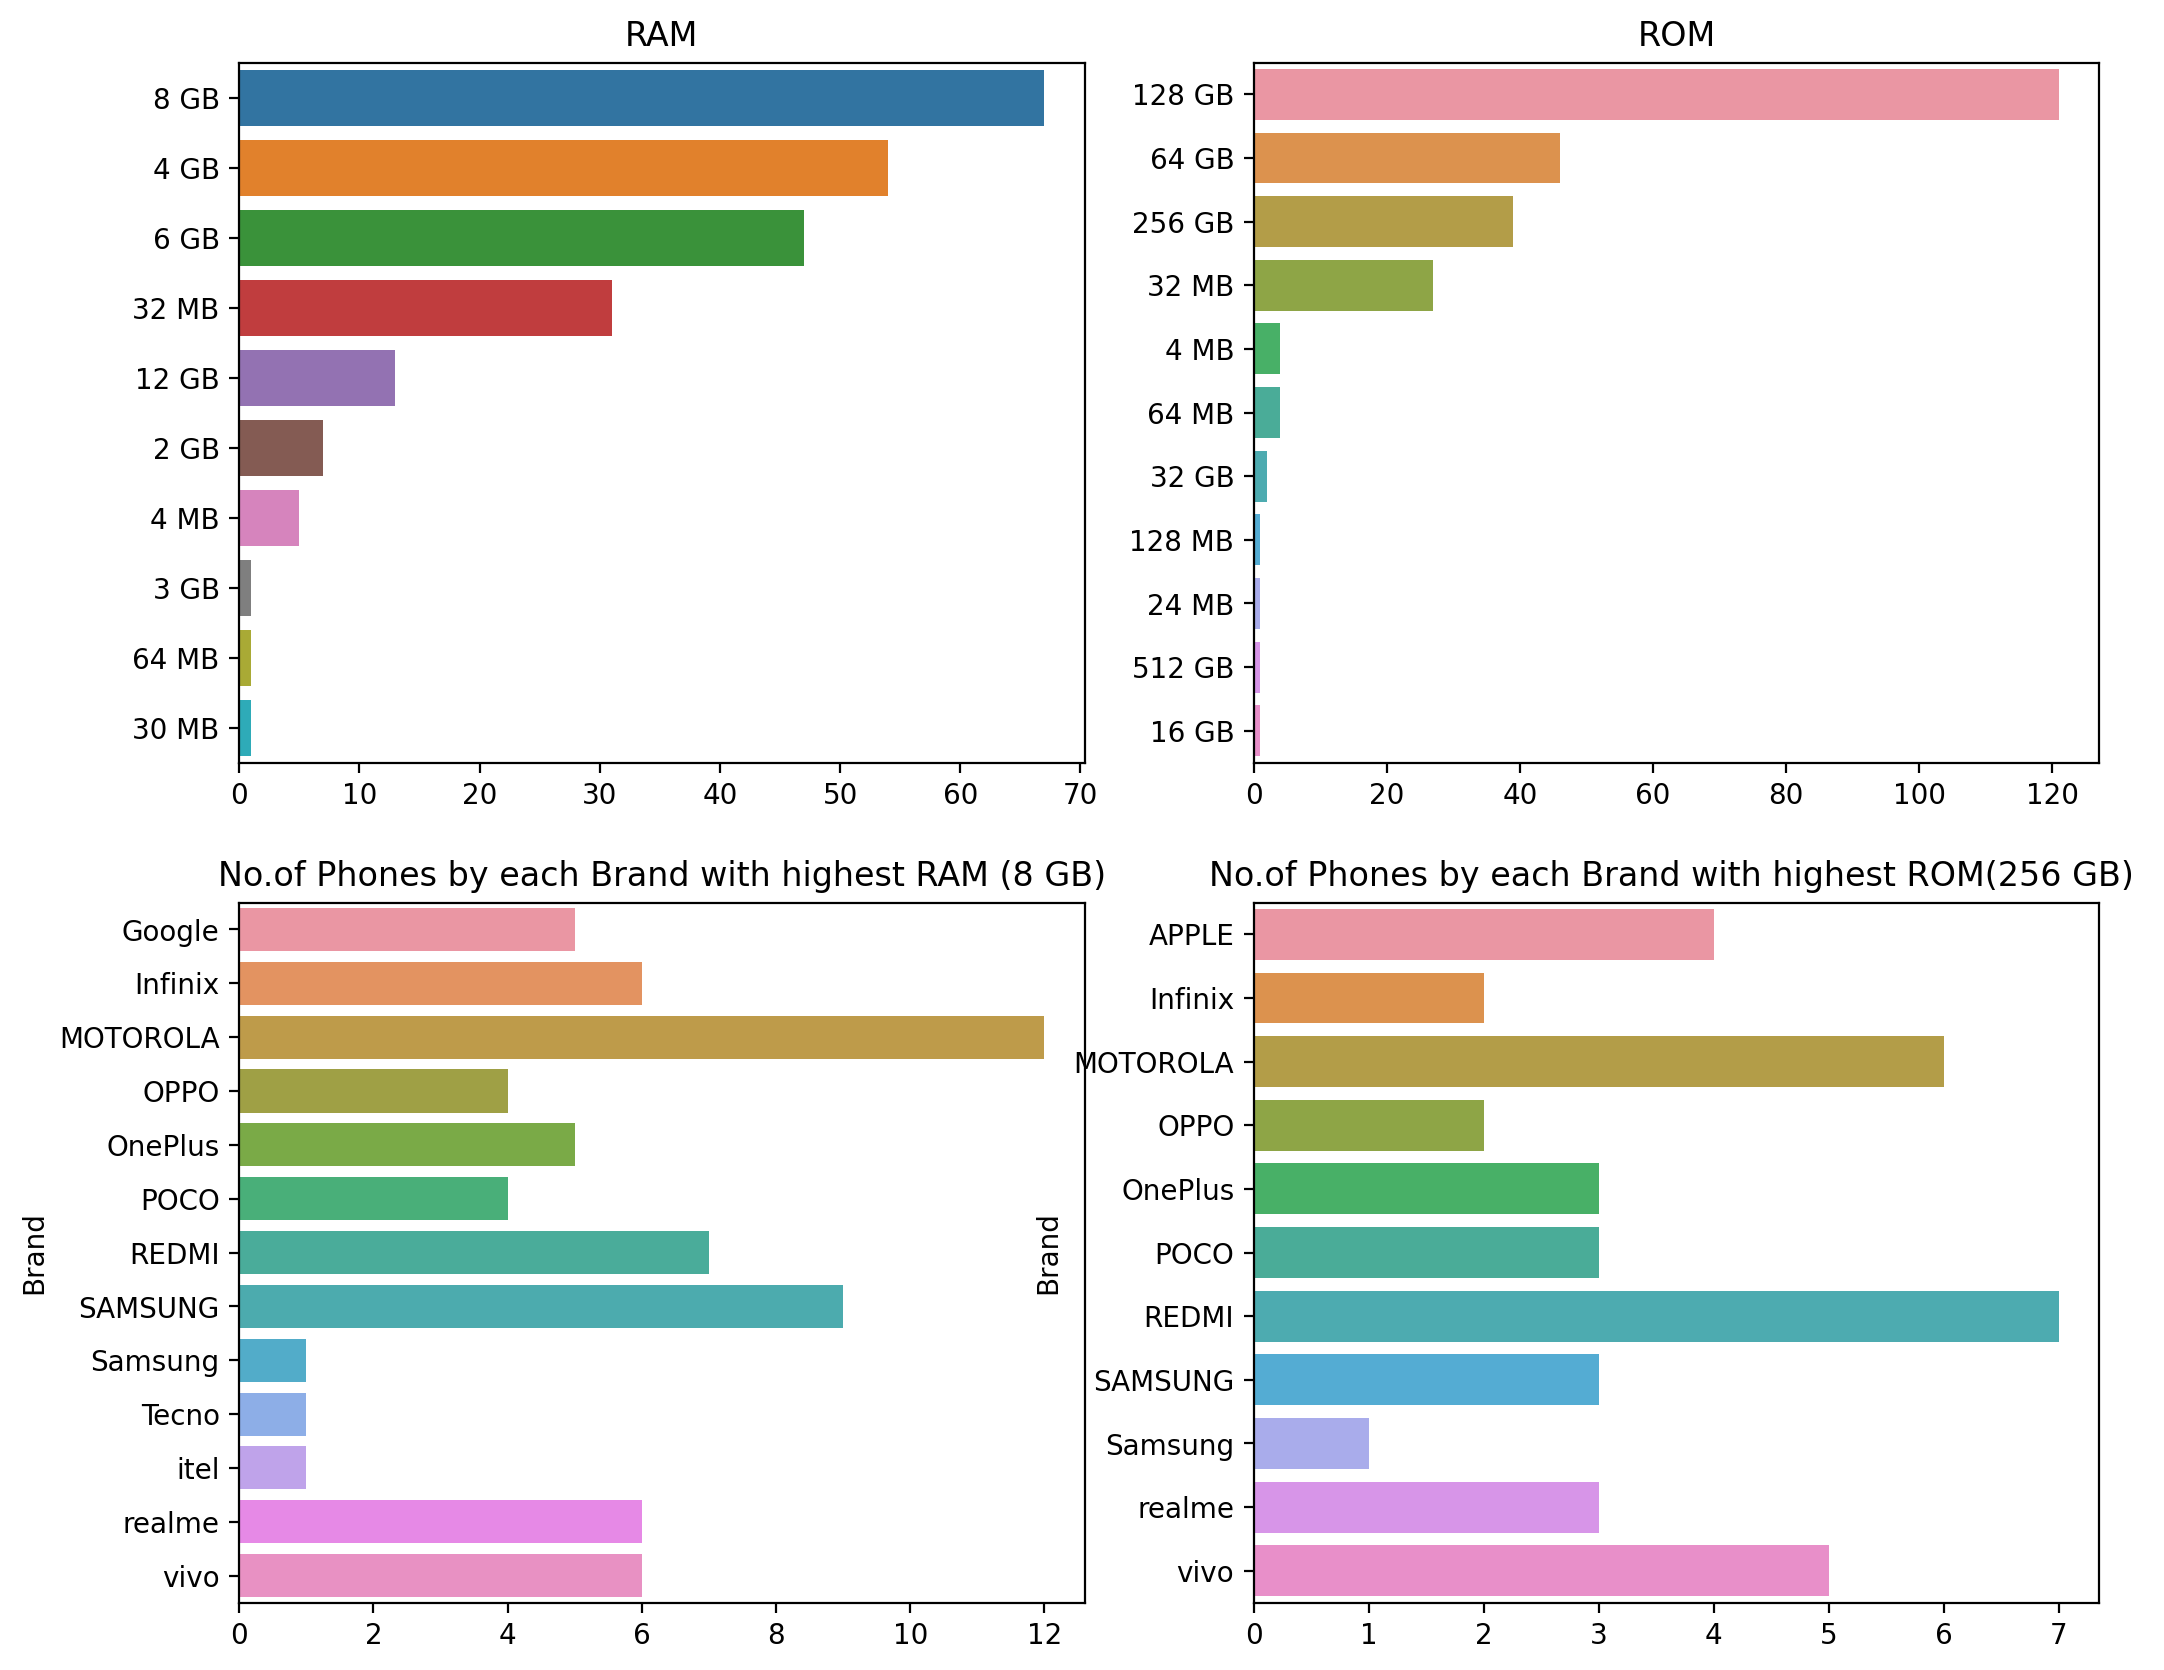

In [50]:
plt.figure(figsize=(12,10),dpi=200),
plt.subplot(2,2,1)
plt.title("RAM")
sns.barplot(ram.values,ram.index)

plt.subplot(2,2,2)
plt.title("ROM")
sns.barplot(rom.values,rom.index)

plt.subplot(2,2,3)
plt.title("Phones with highest RAM")
sns.barplot(ramplot.values,ramplot.index)

plt.subplot(2,2,3)
plt.title("No.of Phones by each Brand with highest RAM (8 GB)")
sns.barplot(ramplot.values,ramplot.index)

plt.subplot(2,2,4)
plt.title("No.of Phones by each Brand with highest ROM(256 GB) ")
sns.barplot(romplot.values,romplot.index)



## ==========================================================================

### Analysis on Rating

In [51]:
df["Rating"].value_counts()

4.2    64
4.3    50
4.1    39
4.4    28
4.6    18
4.0    14
3.9     7
3.6     6
4.5     6
3.3     4
3.8     3
3.5     3
3.7     2
4.7     2
3.4     1
Name: Rating, dtype: int64

In [52]:
top_rated=df.sort_values("Rating",ascending=False)[df["Rating"]>=4.5]
top_rated

,Brand,Product_name,Processor,RAM,ROM,Battery,Display_Size,Camera,No_of_ratings,No_of_reviews,Rating,Price
415,APPLE,"APPLE iPhone 15 Pro Max (Natural Titanium, 256...",6 Core Processor,NaN,256 GB,NaN,6.7 inch,48MP + 12MP + 12MP | 12MP Front Camera,205,20,4.7,159900.0
347,APPLE,"APPLE iPhone 15 Plus (Blue, 128 GB)",6 Core Processor,NaN,128 GB,NaN,6.7 inch,48MP + 12MP | 12MP Front Camera,714,93,4.7,89900.0
431,APPLE,"APPLE iPhone 12 (Red, 64 GB)",A14 Bionic Chip with Next Generation Neural En...,NaN,64 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,203774,13554,4.6,41999.0
118,APPLE,"APPLE iPhone 12 (White, 128 GB)",A14 Bionic Chip with Next Generation Neural En...,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,203774,13554,4.6,47999.0
232,APPLE,"APPLE iPhone 12 (Black, 128 GB)",A14 Bionic Chip with Next Generation Neural En...,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,203774,13554,4.6,47999.0
24,APPLE,"APPLE iPhone 14 Plus (Starlight, 128 GB)",6 Core Processor,NaN,128 GB,NaN,6.7 inch,12MP + 12MP | 12MP Front Camera,50958,2974,4.6,68999.0
82,APPLE,"APPLE iPhone 12 (Blue, 64 GB)",A14 Bionic Chip with Next Generation Neural En...,NaN,64 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,203774,13554,4.6,40999.0
153,APPLE,"APPLE iPhone 15 (Blue, 128 GB)",6 Core Processor,NaN,128 GB,NaN,6.1 inch,48MP + 12MP | 12MP Front Camera,1433,129,4.6,79900.0
265,APPLE,"APPLE iPhone 15 (Black, 128 GB)",6 Core Processor,NaN,128 GB,NaN,6.1 inch,48MP + 12MP | 12MP Front Camera,1433,129,4.6,79900.0
282,APPLE,"APPLE iPhone 15 (Green, 128 GB)",6 Core Processor,NaN,128 GB,NaN,6.1 inch,48MP + 12MP | 12MP Front Camera,1433,129,4.6,79900.0


In [53]:
rating_plot=top_rated.groupby("Brand")["Rating"].count()
rating_plot

Brand
APPLE      20
OnePlus     1
SAMSUNG     1
vivo        4
Name: Rating, dtype: int64

<AxesSubplot:title={'center':'No.of types of top rated phones by each brand'}, ylabel='Brand'>

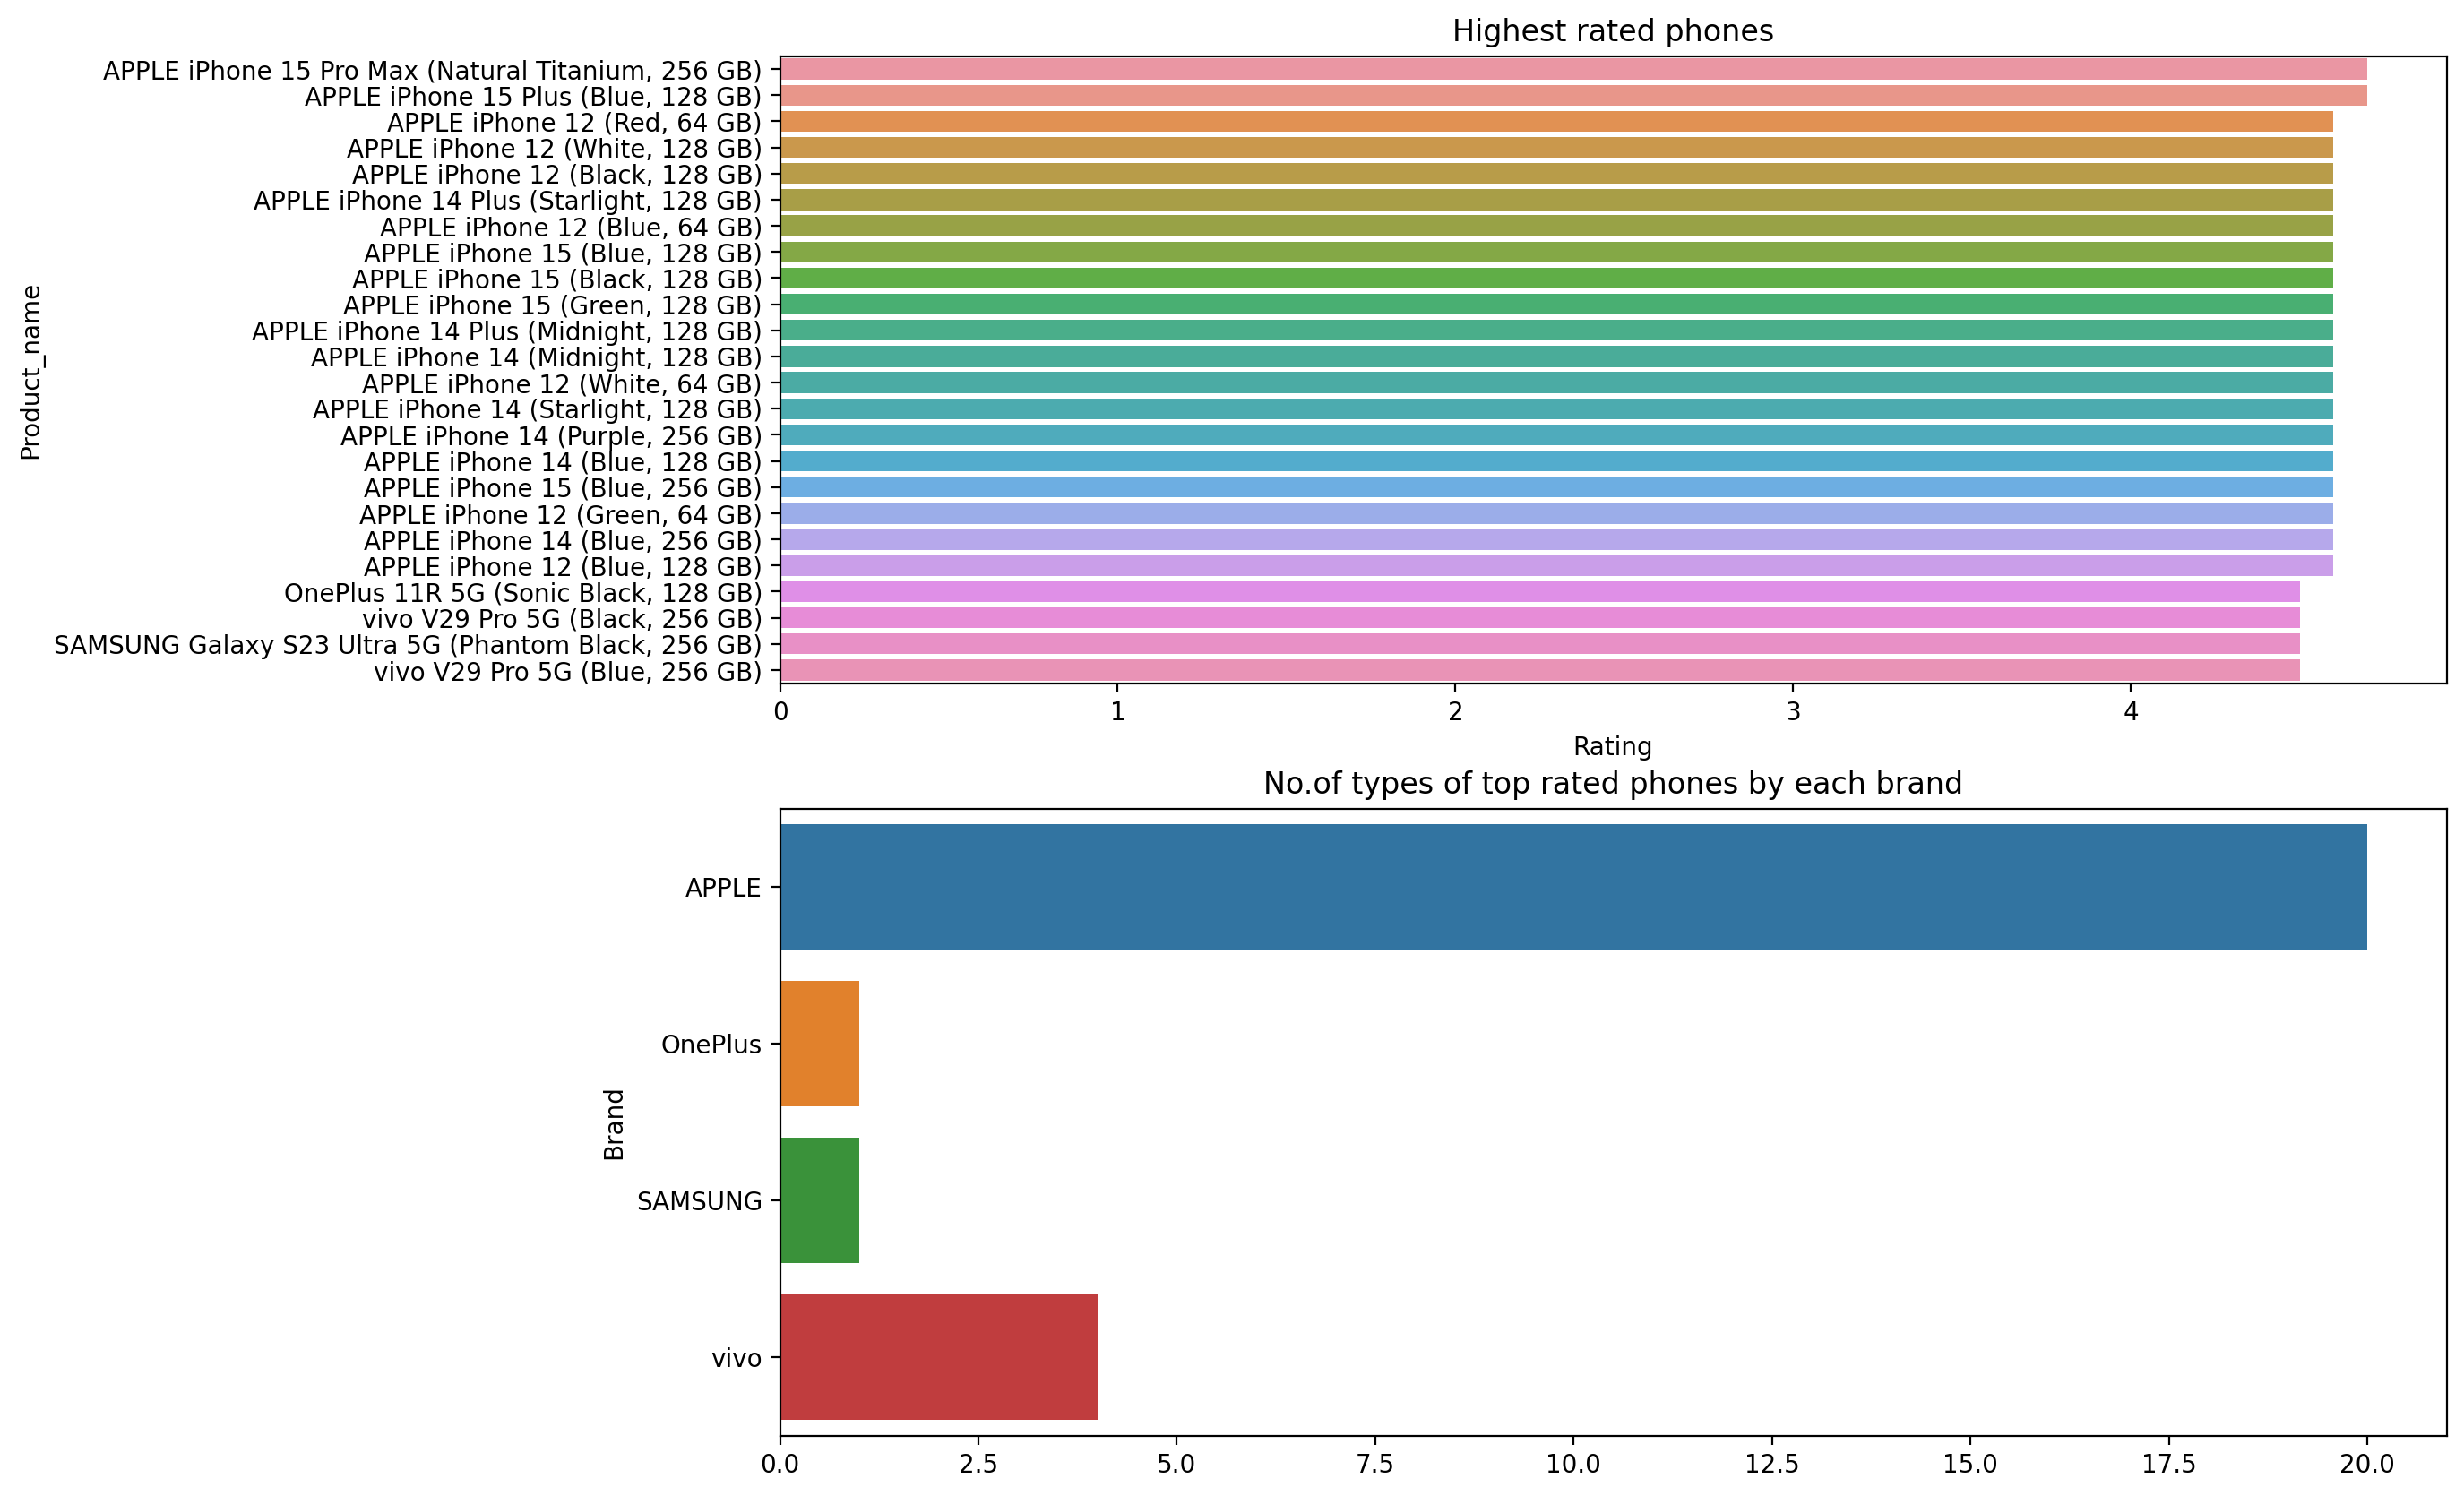

In [54]:
plt.figure(figsize=(12,10),dpi=200)

plt.subplot(2,1,1)
plt.title("Highest rated phones")
sns.barplot("Rating","Product_name",data=top_rated)

plt.subplot(2,1,2)
plt.title("No.of types of top rated phones by each brand")
sns.barplot(rating_plot.values,rating_plot.index)

## ==========================================================================

### Analysis on No.of Ratings and Reviews

In [55]:
num_ratings=df.sort_values("No_of_ratings",ascending=False).head(20)
num_ratings

,Brand,Product_name,Processor,RAM,ROM,Battery,Display_Size,Camera,No_of_ratings,No_of_reviews,Rating,Price
9,vivo,"vivo T2x 5G (Glimmer Black, 128 GB)",Dimensity 6020,6 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera,243122,13240,4.4,12999.0
19,vivo,"vivo T2x 5G (Aurora Gold, 128 GB)",Dimensity 6020,6 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera,243122,13240,4.4,12999.0
14,APPLE,"APPLE iPhone 14 (Midnight, 128 GB)",6 Core Processor,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,231506,8887,4.6,61999.0
2,APPLE,"APPLE iPhone 14 (Blue, 128 GB)",6 Core Processor,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,231506,8887,4.6,60999.0
98,APPLE,"APPLE iPhone 14 (Blue, 256 GB)",6 Core Processor,NaN,256 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,231506,8887,4.6,70999.0
387,APPLE,"APPLE iPhone 14 (Purple, 256 GB)",6 Core Processor,NaN,256 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,231506,8887,4.6,71999.0
12,APPLE,"APPLE iPhone 14 (Starlight, 128 GB)",6 Core Processor,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,231506,8887,4.6,61999.0
242,SAMSUNG,SAMSUNG Guru Music 2,NaN,NaN,NA,800 mAh,2 inch,NaN,213736,19366,4.3,2880.0
431,APPLE,"APPLE iPhone 12 (Red, 64 GB)",A14 Bionic Chip with Next Generation Neural En...,NaN,64 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,203774,13554,4.6,41999.0
118,APPLE,"APPLE iPhone 12 (White, 128 GB)",A14 Bionic Chip with Next Generation Neural En...,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,203774,13554,4.6,47999.0


In [56]:
num_reviews=df.sort_values("No_of_reviews",ascending=False).head(20)
num_reviews

,Brand,Product_name,Processor,RAM,ROM,Battery,Display_Size,Camera,No_of_ratings,No_of_reviews,Rating,Price
242,SAMSUNG,SAMSUNG Guru Music 2,NaN,NaN,NA,800 mAh,2 inch,NaN,213736,19366,4.3,2880.0
431,APPLE,"APPLE iPhone 12 (Red, 64 GB)",A14 Bionic Chip with Next Generation Neural En...,NaN,64 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,203774,13554,4.6,41999.0
39,APPLE,"APPLE iPhone 12 (White, 64 GB)",A14 Bionic Chip with Next Generation Neural En...,NaN,64 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,203774,13554,4.6,41999.0
232,APPLE,"APPLE iPhone 12 (Black, 128 GB)",A14 Bionic Chip with Next Generation Neural En...,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,203774,13554,4.6,47999.0
118,APPLE,"APPLE iPhone 12 (White, 128 GB)",A14 Bionic Chip with Next Generation Neural En...,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,203774,13554,4.6,47999.0
85,APPLE,"APPLE iPhone 12 (Green, 64 GB)",A14 Bionic Chip with Next Generation Neural En...,NaN,64 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,203774,13554,4.6,41999.0
82,APPLE,"APPLE iPhone 12 (Blue, 64 GB)",A14 Bionic Chip with Next Generation Neural En...,NaN,64 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,203774,13554,4.6,40999.0
89,APPLE,"APPLE iPhone 12 (Blue, 128 GB)",A14 Bionic Chip with Next Generation Neural En...,NaN,128 GB,NaN,6.1 inch,12MP + 12MP | 12MP Front Camera,203774,13554,4.6,46999.0
19,vivo,"vivo T2x 5G (Aurora Gold, 128 GB)",Dimensity 6020,6 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera,243122,13240,4.4,12999.0
9,vivo,"vivo T2x 5G (Glimmer Black, 128 GB)",Dimensity 6020,6 GB,128 GB,5000 mAh,6.58 inch,50MP + 2MP | 8MP Front Camera,243122,13240,4.4,12999.0


In [57]:
n_ratings=num_ratings.groupby("Brand")["No_of_ratings"].count()
n_ratings

Brand
APPLE      12
OnePlus     2
SAMSUNG     4
vivo        2
Name: No_of_ratings, dtype: int64

In [58]:
n_reviews=num_reviews.groupby("Brand")["No_of_reviews"].count()
n_reviews

Brand
APPLE      11
OnePlus     2
SAMSUNG     4
Samsung     1
vivo        2
Name: No_of_reviews, dtype: int64

<AxesSubplot:title={'center':'Brands with no.of phones having highest no.of reviews'}, ylabel='Brand'>

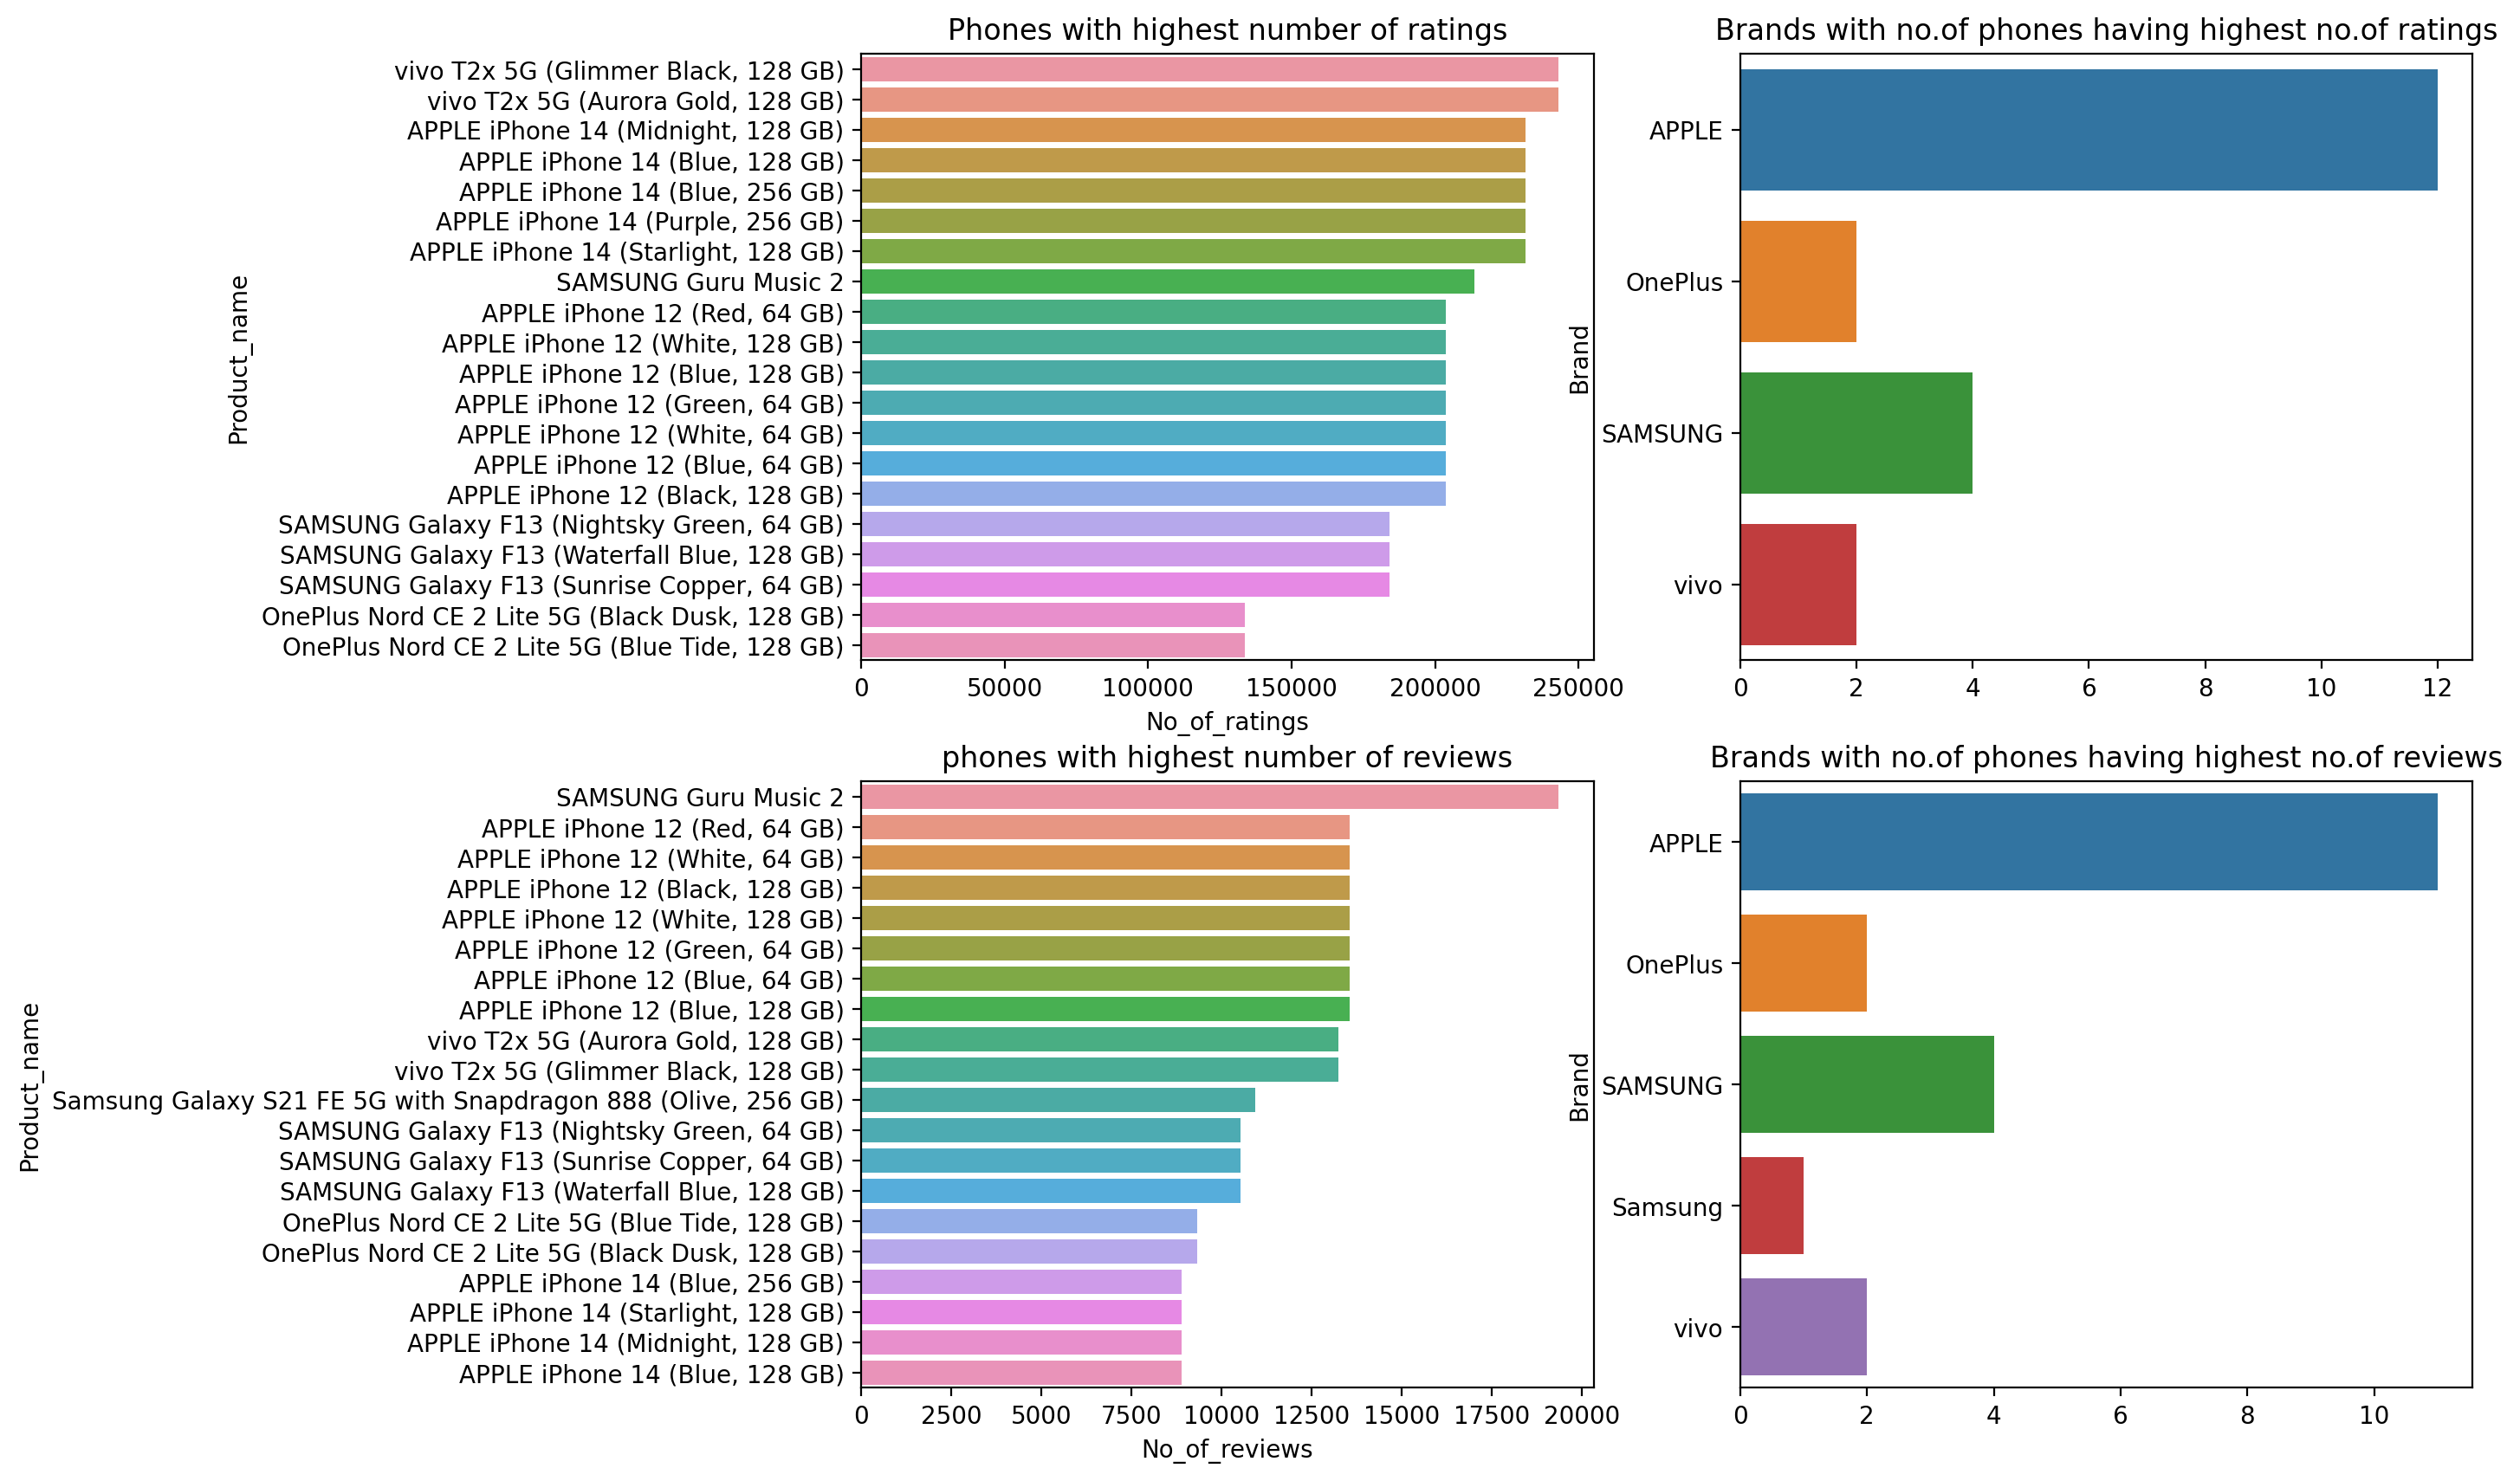

In [59]:
plt.figure(figsize=(12,10),dpi=200)

plt.subplot(2,2,1)
plt.title("Phones with highest number of ratings")
sns.barplot("No_of_ratings","Product_name",data=num_ratings)

plt.subplot(2,2,2)
plt.title("Brands with no.of phones having highest no.of ratings")
sns.barplot( n_ratings.values,n_ratings.index)

plt.subplot(2,2,3)
plt.title("phones with highest number of reviews")
sns.barplot("No_of_reviews","Product_name",data=num_reviews)

plt.subplot(2,2,4)
plt.title("Brands with no.of phones having highest no.of reviews")
sns.barplot(n_reviews.values,n_reviews.index)

## ==========================================================================

### Report on No.of Ratings and Reviews

- No.of Ratings
    - out of the 480 phones analysed Redmi 10 has got the highest ratings. Apple iphone 13 has the second highest and Samsung
      Guru has the third highest ratings in number.
    - Among the top 20 phones with highest number of ratings 9 phones are from the brand Samsung, 8 from Apple, 2 from Redmi and 
      1 from realme.
      
      
- No.of Reviews
    - From the phones analysed Samsung guru music 2 has received the highest number of reviews, Samsung galaxy F23 5G got the 
      second highest and Redmi 10 got the third highest number of reviews.
    - Among the top 20 highest reviewed phones 8 phones are from brand Apple, 7 from Samsung, 2 each from Lava and Redmi and 1
      from Realme
      
      

## ==========================================================================

### Analysis on Display Size

In [60]:
df["Display_Size"].value_counts()

6.6 inch     34
6.5 inch     28
6.1 inch     20
6.67 inch    18
6.72 inch    17
1.8 inch     16
6.7 inch     15
6.78 inch    12
6.79 inch    11
2.4 inch     10
6.71 inch    10
6.58 inch     7
6.74 inch     7
1.77 inch     7
6.52 inch     7
6.38 inch     4
6.55 inch     3
6.8 inch      3
6.56 inch     3
2.8 inch      2
6.59 inch     2
6.3 inch      2
6.82 inch     2
0.66 inch     2
6.51 inch     1
1.44 inch     1
6.4 inch      1
6.68 inch     1
2 inch        1
6.43 inch     1
Name: Display_Size, dtype: int64

In [61]:
df[["Brand","Product_name","Display_Size"]][df["Display_Size"]=='6.82 inch']

,Brand,Product_name,Display_Size
245,Infinix,"Infinix HOT 20 Play (Luna Blue, 64 GB)",6.82 inch
258,Infinix,"Infinix HOT 20 Play (Aurora Green, 64 GB)",6.82 inch
